Corner Detection 

In [1]:
# The image data 
import cv2
import numpy as np 
import matplotlib.pyplot as plt


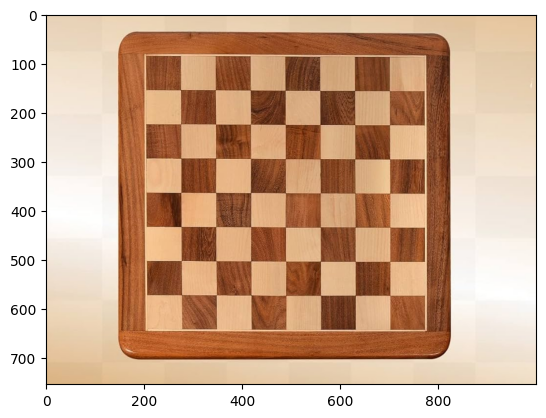

In [2]:
flat_chess = cv2.imread('flat_chess.jpg')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

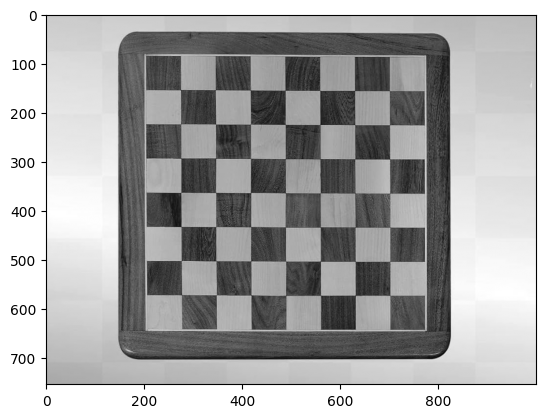

In [3]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

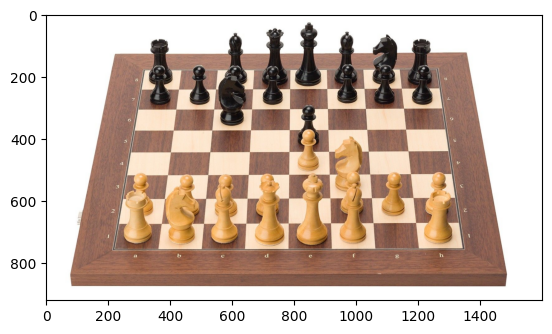

In [4]:
real_chess = cv2.imread('real_chess.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

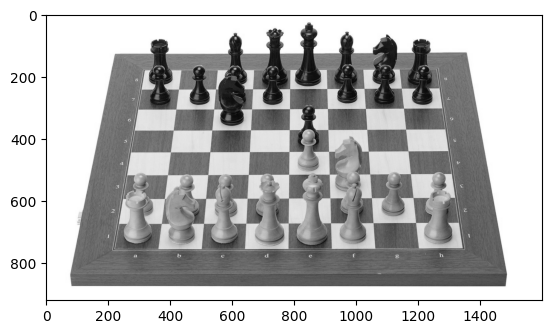

In [5]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

Harris Corner Detection 
- src input single-channel 8-bit or floating-point image.
- dst image to store the Herris detector response. It has the type CV_32FC1 and the same size as src.
- blockSize Neighborhood size.
- ksize Apreture parameter for the Sobel filter.
- K Herris deterctor free parameter. See the formula in DocString.
- borderType pixel extrapolaration method. 

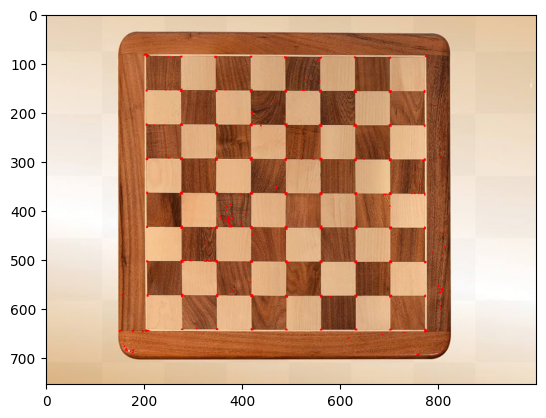

In [6]:
# Convert Gray scale image to float values 
gray = np.float32(gray_flat_chess)

#Corner Harris Detection 
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection 
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image
flat_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

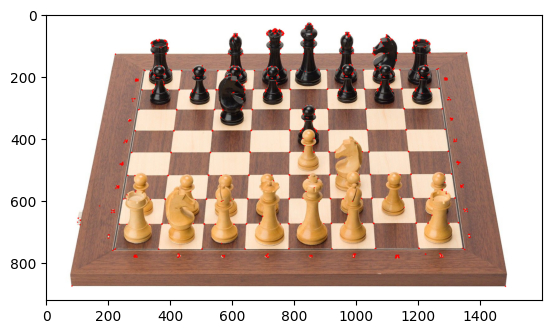

In [7]:
# Convert Gray scale Image to float Values 
gray = np.float32(gray_real_chess)

# Corner Herris Detection
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

# result is  diluted for marking the corners, not important to actual corner detection
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()] = [255,0,0]

plt.imshow(real_chess)

Shi-Tomasi corner Detector and Good Feature Tracker Path 
- image input 8-bit or floating-point 32-bit, single-channel image.
- corners output vector of detected corners.
- maxCorners Maximum numbers of corners to return. If there are more corners than are found the strongest of them returned.
- qualityLevel parameter characterizing the minimal eigenvalue of herris function response. The corners with quality measures = 1500, and the qualityLevel = 0.01, then all the corners with the quality measure less than quality measure = 1500, and the qualityLevel=0.01, then all the corners with the quality less than 15 are rejected.

In [8]:
# Need to reset the images since we drew on them 
flat_chess = cv2.imread('flat_chessboard.jpeg')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

/tmp/ipykernel_144780/784026469.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


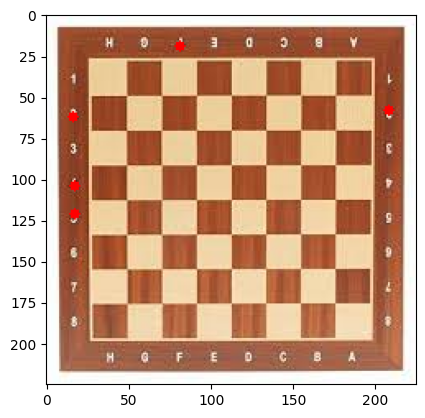

In [9]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

/tmp/ipykernel_144780/2653828344.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


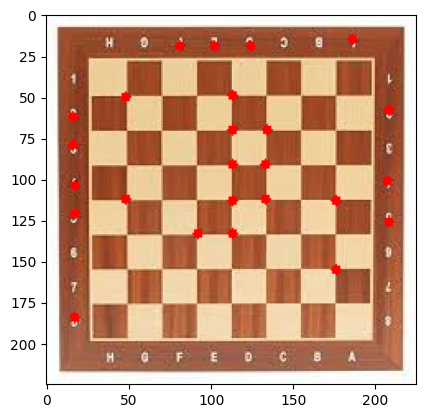

In [10]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)


In [11]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

/tmp/ipykernel_144780/1234032077.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


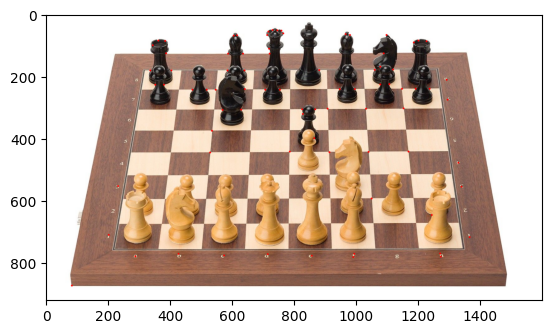

In [12]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)



In [13]:
# Done